## Miguel Alfonso Gallego Alvarez

In [ ]:
import pandas as pd  # Manejo dataframe
import numpy as np  # Manejo lista arreglos
import openpyxl  # Tipo especial
import matplotlib.pyplot as plt  # Manejo tablas
import seaborn as sns # Manejo de tablas

In [ ]:
df = pd.read_excel("Salarios.xlsx")


In [ ]:
df.head()

age  education-num       marital-status    relationship    race      sex  \
0   39             13        Never-married   Not-in-family   White     Male   
1   50             13   Married-civ-spouse         Husband   White     Male   
2   38              9             Divorced   Not-in-family   White     Male   
3   53              7   Married-civ-spouse         Husband   Black     Male   
4   37             14   Married-civ-spouse            Wife   White   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salary  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40   United-States   <=50K

# Descripci√≥n columnas del dataset

- age: Edad de la persona en a√±os. Tipo = Num√©rica continua

- education-num: N√∫mero de a√±os de educaci√≥n formal completados. Tipo = Num√©rica discreta

- marital-status: Estado civil actual de la persona (Never-married, Married-civ-spouse, Divorced, etc.). Tipo = Categ√≥rica nominal polit√≥mica

- relationship: Relaci√≥n de la persona dentro del n√∫cleo familiar (Husband, Wife, Not-in-family, Own-child, etc.). Tipo = Categ√≥rica nominal polit√≥mica

- race: Raza declarada de la persona (White, Black, Asian-Pac-Islander, etc.). Tipo = Categ√≥rica nominal polit√≥mica

- sex: G√©nero declarado de la persona (Male, Female). Tipo = Categ√≥rica nominal dicot√≥mica

- capital-gain: Ganancia de capital (USD) obtenida en el √∫ltimo a√±o. Tipo = Num√©rica continua

- capital-loss: P√©rdida de capital (USD) registrada en el √∫ltimo a√±o. Tipo = Num√©rica continua

- hours-per-week: N√∫mero de horas trabajadas por semana. Tipo = Num√©rica discreta

- native-country: Pa√≠s de origen de la persona. Tipo = Categ√≥rica nominal polit√≥mica

- salary: Categor√≠a salarial estimada (<=50K, >50K). Tipo = Categ√≥rica ordinal dicot√≥mica

# EDA y Limpieza del data set

Conocemos la dimensi√≥n de la matriz

In [ ]:
df.shape

(29170, 11)

Conocemos los tipos de datos como los lee python, por si deben hacer cambios sobre el tipo de alguno de estos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29170 entries, 0 to 29169
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29170 non-null  int64 
 1   education-num   29170 non-null  int64 
 2   marital-status  29170 non-null  object
 3   relationship    29170 non-null  object
 4   race            29170 non-null  object
 5   sex             29170 non-null  object
 6   capital-gain    29170 non-null  int64 
 7   capital-loss    29170 non-null  int64 
 8   hours-per-week  29170 non-null  int64 
 9   native-country  29170 non-null  object
 10  salary          29170 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.4+ MB


Se observa que no hay valores nulos non-null en todas las columnas, lo que simplifica la limpieza inicial.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

age               0
education-num     0
marital-status    0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

En base a los primeros pasos se observa que el dataset cuenta con cinco variables num√©ricas enteras (age, education-num, capital-gain, capital-loss y hours-per-week), las cuales podrian ser  √∫tiles para an√°lisis estad√≠sticos y modelos predictivos, y seis variables categ√≥ricas (marital-status, relationship, race, sex, native-country y salary), las cuales se podr√≠an convertirse a tipo categor√≠a para optimizar memoria y an√°lisis. Ademas se confirma que no presenta valores nulos, lo que facilita el trabajo de limpieza, aunque ser√° necesario revisar la presencia de valores at√≠picos y categor√≠as poco frecuentes.

In [ ]:
df.head(25)

age  education-num       marital-status    relationship    race      sex  \
0    39             13        Never-married   Not-in-family   White     Male   
1    50             13   Married-civ-spouse         Husband   White     Male   
2    38              9             Divorced   Not-in-family   White     Male   
3    53              7   Married-civ-spouse         Husband   Black     Male   
4    37             14   Married-civ-spouse            Wife   White   Female   
5    52              9   Married-civ-spouse         Husband   White     Male   
6    31             14        Never-married   Not-in-family   White   Female   
7    42             13   Married-civ-spouse         Husband   White     Male   
8    37             10   Married-civ-spouse         Husband   Black     Male   
9    23             13        Never-married       Own-child   White   Female   
10   32             12        Never-married   Not-in-family   Black     Male   
11   25              9        Never-married       Own-child   White     Male   
12   32              9        Never-married       Unmarried   White     Male   
13   38              7   Married-civ-spouse         Husband   White     Male   
14   43             14             Divorced       Unmarried   White   Female   
15   40             16   Married-civ-spouse         Husband   White     Male   
16   54              9            Separated       Unmarried   Black   Female   
17   35              5   Married-civ-spouse         Husband   Black     Male   
18   43              7   Married-civ-spouse         Husband   White     Male   
19   59              9             Divorced       Unmarried   White   Female   
20   56             13   Married-civ-spouse         Husband   White     Male   
21   19              9        Never-married       Own-child   White     Male   
22   39              9             Divorced   Not-in-family   White     Male   
23   49              9   Married-civ-spouse         Husband   White     Male   
24   23             12        Never-married   Not-in-family   White     Male   

    capital-gain  capital-loss  hours-per-week  native-country  salary  
0           2174             0              40   United-States   <=50K  
1              0             0              13   United-States   <=50K  
2              0             0              40   United-States   <=50K  
3              0             0              40   United-States   <=50K  
4              0             0              40   United-States   <=50K  
5              0             0              45   United-States    >50K  
6          14084             0              50   United-States    >50K  
7           5178             0              40   United-States    >50K  
8              0             0              80   United-States    >50K  
9              0             0              30   United-States   <=50K  
10             0             0              50   United-States   <=50K  
11             0             0              35   United-States   <=50K  
12             0             0              40   United-States   <=50K  
13             0             0              50   United-States   <=50K  
14             0             0              45   United-States    >50K  
15             0             0              60   United-States    >50K  
16             0             0              20   United-States   <=50K  
17             0             0              40   United-States   <=50K  
18             0          2042              40   United-States   <=50K  
19             0             0              40   United-States   <=50K  
20             0             0              40   United-States    >50K  
21             0             0              40   United-States   <=50K  
22             0             0              80   United-States   <=50K  
23             0             0              40   United-States   <=50K  
24             0             0              52   United-States   <=50K

La conversi√≥n de variables como marital-status, relationship, race, sex, native-country y salary a tipo category se justifica porque representan grupos o etiquetas discretas sin un orden num√©rico real, lo que optimiza el uso de memoria y permite un manejo m√°s eficiente en an√°lisis y modelos. Mantener las variables num√©ricas en su formato original es clave para conservar la precisi√≥n en c√°lculos y evitar interpretaciones err√≥neas.

In [ ]:
df.nunique()

age                73
education-num      16
marital-status      7
relationship        6
race                5
sex                 2
capital-gain      119
capital-loss       89
hours-per-week     94
native-country      1
salary              2
dtype: int64

El dataset muestra una variabilidad adecuada en la mayor√≠a de sus variables, lo que es positivo para el an√°lisis. Variables como age, capital-gain, capital-loss y hours-per-week presentan un rango amplio de valores, lo que podr√≠a aportar informaci√≥n relevante para predecir el salario. Las variables categ√≥ricas como marital-status, relationship, race y sex tienen un n√∫mero moderado de categor√≠as, lo que facilita su codificaci√≥n sin riesgo de alta dimensionalidad. Sin embargo, native-country presenta solo un valor √∫nico, lo que la hace irrelevante para el an√°lisis y podr√≠a eliminarse, ya que no aporta variabilidad. La variable objetivo salary presenta √∫nicamente dos categor√≠as (<=50K y >50K), lo que indica que el an√°lisis corresponde a un problema de clasificaci√≥n binaria; aunque a√∫n no se ha transformado a formato num√©rico (0 y 1), su naturaleza dicot√≥mica permitir√° esa conversi√≥n en la etapa de preprocesamiento para facilitar el modelado.

In [ ]:
df = df.drop(columns=["native-country"])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29170 entries, 0 to 29169
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29170 non-null  int64 
 1   education-num   29170 non-null  int64 
 2   marital-status  29170 non-null  object
 3   relationship    29170 non-null  object
 4   race            29170 non-null  object
 5   sex             29170 non-null  object
 6   capital-gain    29170 non-null  int64 
 7   capital-loss    29170 non-null  int64 
 8   hours-per-week  29170 non-null  int64 
 9   salary          29170 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.2+ MB


In [ ]:
categoricas = ["marital-status", "relationship", "race", "sex", "salary"]

for col in categoricas:
    df[col] = df[col].astype("category")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29170 entries, 0 to 29169
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             29170 non-null  int64   
 1   education-num   29170 non-null  int64   
 2   marital-status  29170 non-null  category
 3   relationship    29170 non-null  category
 4   race            29170 non-null  category
 5   sex             29170 non-null  category
 6   capital-gain    29170 non-null  int64   
 7   capital-loss    29170 non-null  int64   
 8   hours-per-week  29170 non-null  int64   
 9   salary          29170 non-null  category
dtypes: category(5), int64(5)
memory usage: 1.3 MB


In [ ]:
df.isnull().sum().sort_values(ascending=False)

age               0
education-num     0
marital-status    0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
salary            0
dtype: int64

Se decide convertir las variables marital-status, relationship, race, sex y salary a tipo categor√≠a porque representan grupos o etiquetas discretas que permiten identificar patrones y segmentaciones relevantes para el an√°lisis, especialmente en relaci√≥n con la variable objetivo salary. Mantener las variables num√©ricas (age, education-num, capital-gain, capital-loss y hours-per-week) en su formato original es fundamental para preservar su significado cuantitativo y aprovecharlas en la detecci√≥n de tendencias, correlaciones y posibles factores que influyen en el salario.

In [ ]:
df.head()

age  education-num       marital-status    relationship    race      sex  \
0   39             13        Never-married   Not-in-family   White     Male   
1   50             13   Married-civ-spouse         Husband   White     Male   
2   38              9             Divorced   Not-in-family   White     Male   
3   53              7   Married-civ-spouse         Husband   Black     Male   
4   37             14   Married-civ-spouse            Wife   White   Female   

   capital-gain  capital-loss  hours-per-week  salary  
0          2174             0              40   <=50K  
1             0             0              13   <=50K  
2             0             0              40   <=50K  
3             0             0              40   <=50K  
4             0             0              40   <=50K

In [ ]:
df.describe()

age  education-num  capital-gain  capital-loss  hours-per-week
count  29170.000000   29170.000000  29170.000000  29170.000000    29170.000000
mean      38.655674      10.169455   1089.229928     88.510593       40.447755
std       13.722408       2.394966   7381.898528    405.681709       12.417203
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       48.000000      12.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000

Las variables num√©ricas muestran valores dentro de rangos esperados para la mayor√≠a de los casos, aunque existen posibles outliers. Por ejemplo, capital-gain y capital-loss presentan m√°ximos muy elevados (99,999 y 4,356 respectivamente) en comparaci√≥n con sus medianas, lo que indica que la mayor√≠a de los registros son cero y unos pocos casos tienen valores at√≠picos muy altos. En hours-per-week se observan valores m√≠nimos y m√°ximos extremos (1 y 99 horas), que podr√≠an no ser realistas y requerir revisi√≥n. La variable age va de 17 a 90 a√±os, lo que es coherente para poblaci√≥n laboral, aunque conviene validar casos l√≠mite. Estos hallazgos permiten enfocar el an√°lisis en la detecci√≥n y tratamiento de outliers, dado que pueden influir en el modelado y la interpretaci√≥n de los resultados.

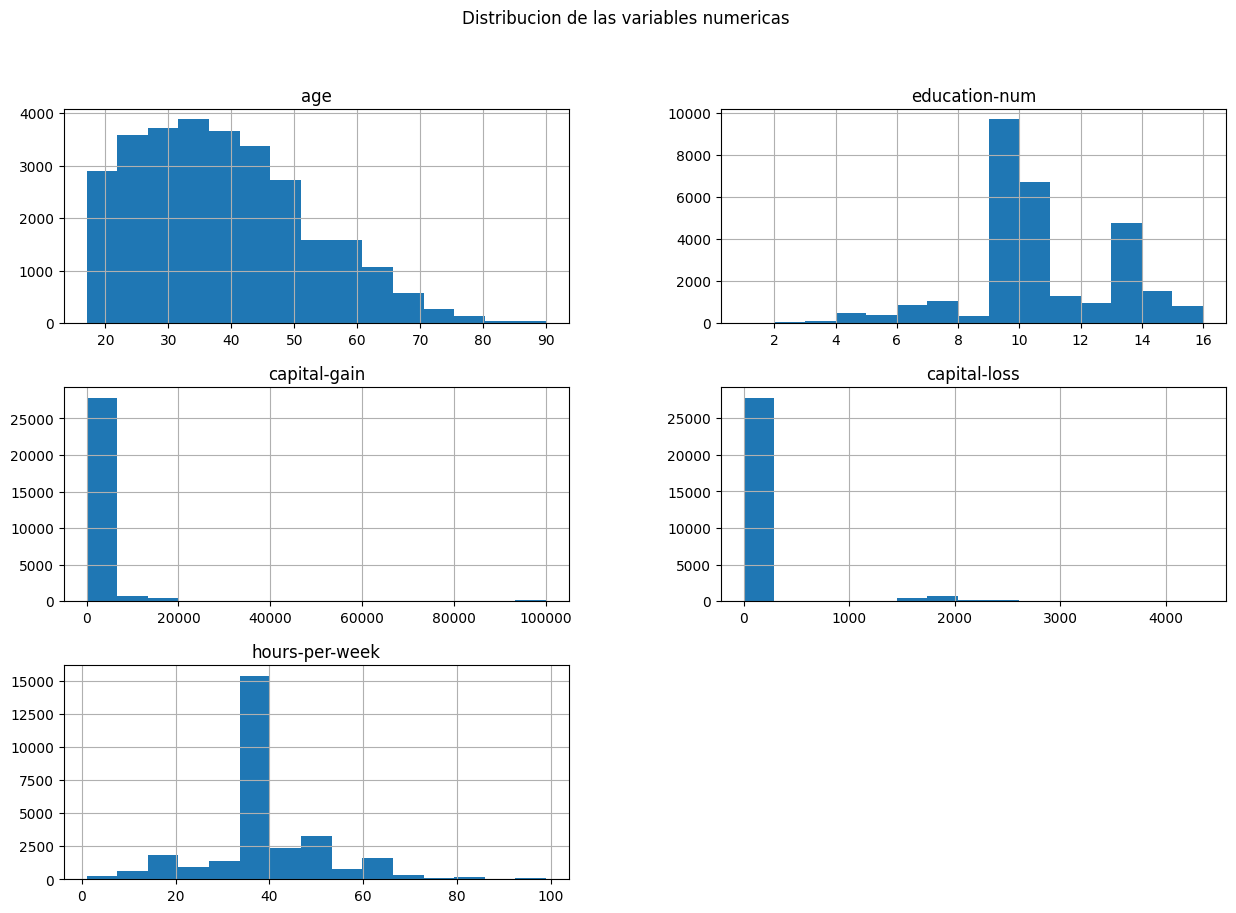

In [ ]:
df.select_dtypes(include=np.number).hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribucion de las variables numericas')
plt.show()

El an√°lisis de las distribuciones revela patrones y posibles anomal√≠as que influyen directamente en la calidad del modelo. La variable age concentra la mayor√≠a de registros entre los 25 y 50 a√±os, pero incluye casos desde 17 a√±os, lo que podr√≠a corresponder a trabajos temporales o de medio tiempo y merece revisi√≥n para determinar su relevancia. education-num muestra niveles educativos dominantes en valores como 9, 10 y 13, lo que puede ser un factor determinante en la predicci√≥n de ingresos. Tanto capital-gain como capital-loss est√°n fuertemente sesgados hacia cero, con pocos valores muy altos que act√∫an como outliers y podr√≠an distorsionar el an√°lisis si no se tratan adecuadamente. En hours-per-week, la concentraci√≥n est√° en 40 horas semanales, con valores extremos como 1 y 99 horas que requieren validaci√≥n, ya que podr√≠an deberse a errores de registro o casos at√≠picos poco representativos. Estos hallazgos orientan la limpieza de datos hacia la depuraci√≥n de valores extremos y la validaci√≥n de casos especiales para asegurar un an√°lisis m√°s robusto.

In [ ]:
df[df["age"] < 18]

df[df["age"] < 18]["salary"].value_counts()


salary
<=50K    374
>50K       0
Name: count, dtype: int64

Se detectaron 374 registros con edad menor a 18 a√±os, todos con salario <=50K. Este grupo no presenta variabilidad en la variable objetivo y corresponde a un segmento laboral at√≠pico (probablemente empleos de medio tiempo o estudiantes). Se recomienda eliminarlos para evitar sesgos y centrar el an√°lisis en poblaci√≥n adulta econ√≥micamente activa.

In [ ]:
df = df[(df["age"] >= 18) & (df["age"] <= 90)]

Se decidi√≥ filtrar las edades para conservar √∫nicamente registros entre 18 y 90 a√±os. Los menores de 18 no aportan variabilidad en la variable objetivo (todos presentan salario <=50K) y corresponden a un segmento laboral at√≠pico que podr√≠a introducir sesgos. El l√≠mite superior de 90 a√±os se mantiene como valor m√°ximo razonable para la poblaci√≥n en edad laboral, evitando posibles registros an√≥malos que distorsionen el an√°lisis y el modelado.

<Axes: xlabel='capital-gain'>

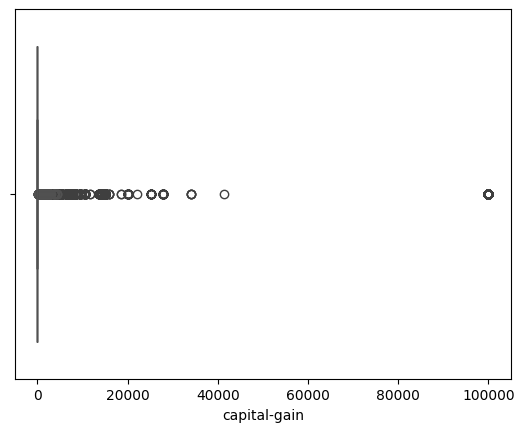

In [ ]:

df["capital-gain"].describe()
df["capital-loss"].describe()

sns.boxplot(x=df["capital-gain"])
sns.boxplot(x=df["capital-loss"])

La mayor√≠a de las personas en el dataset no reporta ganancias de capital, pero hay unos pocos casos con valores muy altos que se salen del comportamiento general. Estos casos, aunque pueden ser reales, son poco comunes y podr√≠an influir demasiado en el an√°lisis.

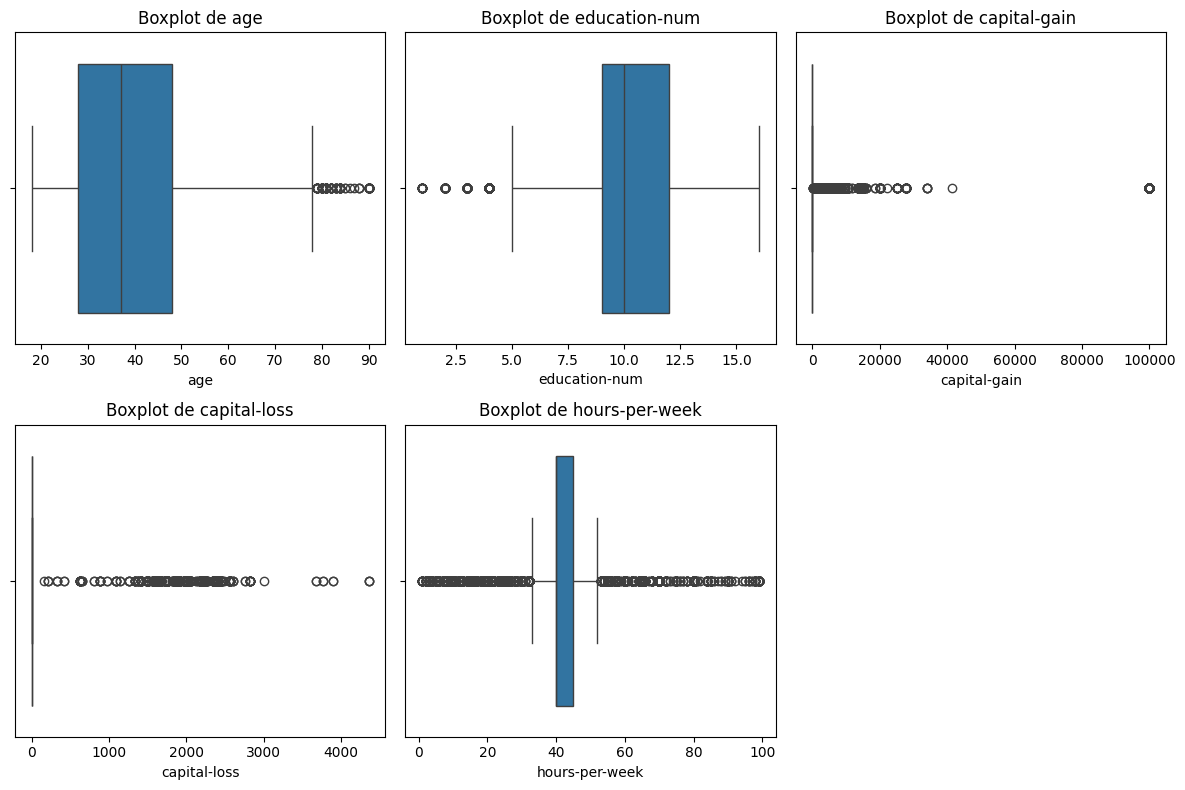

In [ ]:
num_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


plt.figure(figsize=(12, 8))


for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()


La mayor√≠a de los datos est√°n dentro de rangos normales, pero hay casos que llaman la atenci√≥n. En age, casi todos est√°n en edades laborales, pero hay personas con m√°s de 80 a√±os que son muy pocas y habr√≠a que revisar si son reales. En education-num, algunos tienen niveles de estudio muy bajos que podr√≠an juntarse en grupos m√°s generales. En capital-gain y capital-loss casi todos tienen valor cero, pero hay unos pocos con cifras muy altas que sobresalen mucho y podr√≠an influir demasiado en el an√°lisis si no se ajustan. En hours-per-week, la mayor√≠a trabaja 40 horas, aunque tambi√©n hay casos de personas con solo 1 hora o hasta 99 horas por semana, que son poco comunes y convendr√≠a revisar si son correctos.

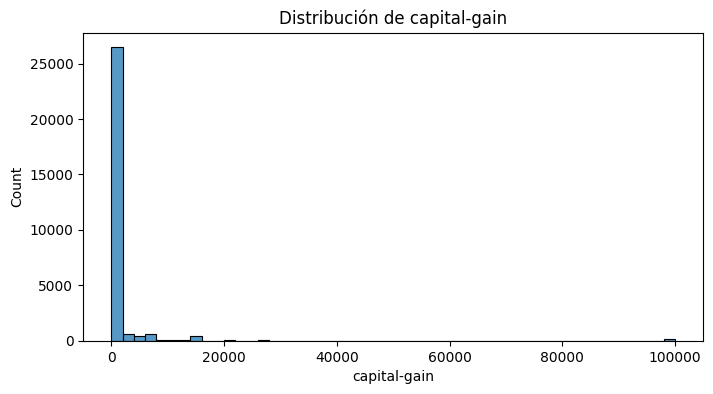

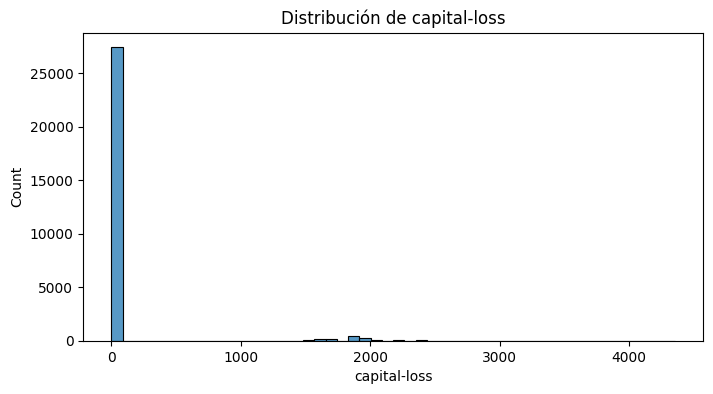

In [ ]:
for col in ["capital-gain", "capital-loss"]:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=50, kde=False)
    plt.title(f"Distribuci√≥n de {col}")
    plt.show()

En ambas variables (capital-gain y capital-loss) la gran mayor√≠a de los registros tienen valor cero, lo que indica que la mayor√≠a de las personas no reportan ganancias ni p√©rdidas de capital. Solo un grupo muy peque√±o presenta valores positivos, y dentro de ellos hay casos extremadamente altos que se alejan mucho del resto. Este patr√≥n genera una distribuci√≥n muy sesgada y con outliers evidentes, lo que puede afectar el an√°lisis y el entrenamiento de modelos.

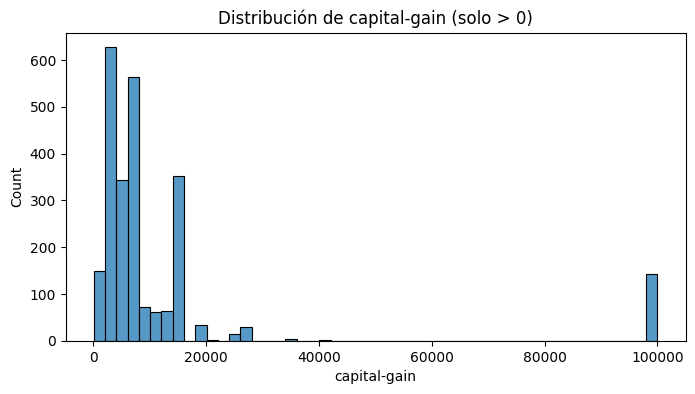

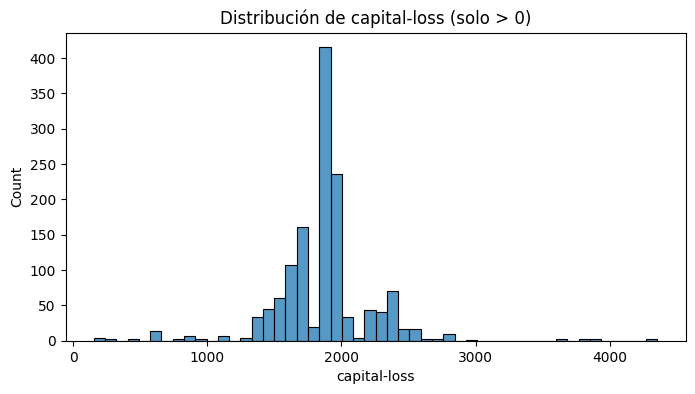

In [ ]:
for col in ["capital-gain", "capital-loss"]:
    plt.figure(figsize=(8,4))
    sns.histplot(df[df[col] > 0][col], bins=50, kde=False)
    plt.title(f"Distribuci√≥n de {col} (solo > 0)")
    plt.show()

Al analizar solo los valores mayores a cero, se observa que tanto en capital-gain como en capital-loss la distribuci√≥n sigue estando muy concentrada en rangos bajos o medios, pero con picos bien definidos y unos pocos valores extremadamente altos. En capital-gain destaca un valor muy separado del resto (cercano a 100,000), mientras que en capital-loss la mayor√≠a de los casos se concentran alrededor de 2,000, con unos pocos que superan los 4,000. Esto confirma que, aunque los ceros son mayor√≠a, los valores positivos tambi√©n presentan outliers que podr√≠an influir de forma desproporcionada en el an√°lisis y modelado.

El an√°lisis de las distribuciones de capital-gain y capital-loss muestra que, aunque la mayor√≠a de los valores son cero, existe un grupo reducido con montos positivos, algunos de ellos muy elevados. Estos valores, aunque son outliers, representan situaciones reales que aportan informaci√≥n sobre ingresos adicionales y p√©rdidas significativas, por lo que se mantendr√°n en el dataset. Conservar estas variables permite reflejar de manera m√°s completa las diferentes fuentes de ingresos y egresos de capital, informaci√≥n que puede ser clave para el an√°lisis y para identificar patrones relevantes en el conjunto de datos.

In [ ]:
categoricas = ["marital-status", "relationship", "race", "sex", "salary"]


In [ ]:
for col in categoricas:
    print(f" {col}")
    print(df[col].value_counts())
    print("-" * 40)


 marital-status
marital-status
Married-civ-spouse       13366
Never-married             9207
Divorced                  4162
Widowed                    902
Separated                  883
Married-spouse-absent      253
Married-AF-spouse           23
Name: count, dtype: int64
----------------------------------------
 relationship
relationship
Husband           11860
Not-in-family      7519
Own-child          4344
Unmarried          3028
Wife               1361
Other-relative      684
Name: count, dtype: int64
----------------------------------------
 race
race
White                 25288
Black                  2800
Amer-Indian-Eskimo      293
Asian-Pac-Islander      291
Other                   124
Name: count, dtype: int64
----------------------------------------
 sex
sex
Male      19292
Female     9504
Name: count, dtype: int64
----------------------------------------
 salary
salary
<=50K    21625
>50K      7171
Name: count, dtype: int64
----------------------------------------


In [ ]:
for col in categoricas:
    print(f" {col}")
    print((df[col].value_counts(normalize=True) * 100).round(2))
    print("-" * 40)


 marital-status
marital-status
Married-civ-spouse       46.42
Never-married            31.97
Divorced                 14.45
Widowed                   3.13
Separated                 3.07
Married-spouse-absent     0.88
Married-AF-spouse         0.08
Name: proportion, dtype: float64
----------------------------------------
 relationship
relationship
Husband           41.19
Not-in-family     26.11
Own-child         15.09
Unmarried         10.52
Wife               4.73
Other-relative     2.38
Name: proportion, dtype: float64
----------------------------------------
 race
race
White                 87.82
Black                  9.72
Amer-Indian-Eskimo     1.02
Asian-Pac-Islander     1.01
Other                  0.43
Name: proportion, dtype: float64
----------------------------------------
 sex
sex
Male      67.0
Female    33.0
Name: proportion, dtype: float64
----------------------------------------
 salary
salary
<=50K    75.1
>50K     24.9
Name: proportion, dtype: float64
-------------------

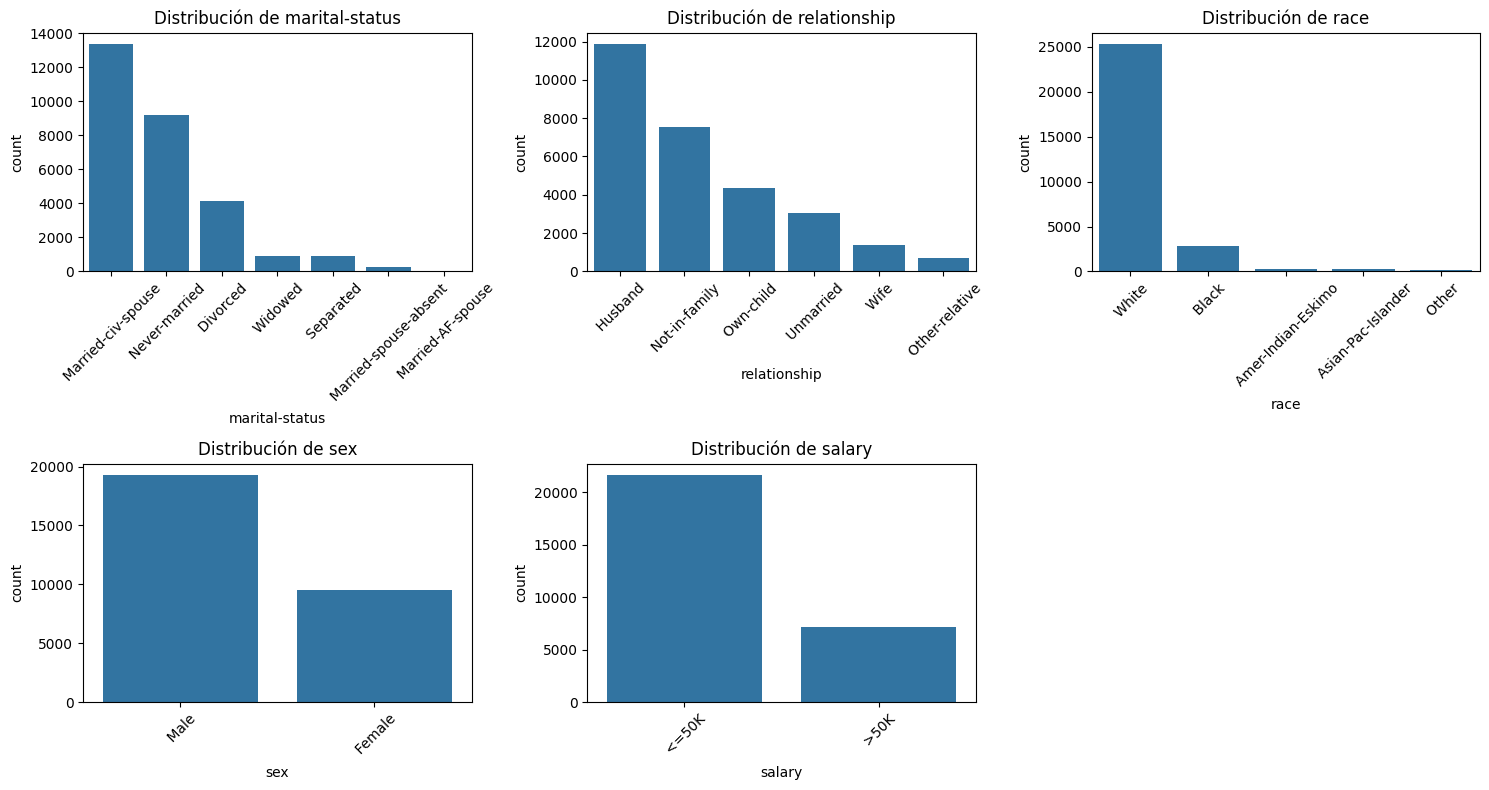

In [ ]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(categoricas, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribuci√≥n de {col}")

plt.tight_layout()
plt.show()

- Marital-status
Predominan las personas casadas con c√≥nyuge presente (Married-civ-spouse), seguidas de quienes nunca se han casado y divorciados. Las dem√°s categor√≠as (Widowed, Separated, Married-spouse-absent, Married-AF-spouse) son muy poco frecuentes, lo que sugiere que podr√≠an agruparse en un grupo ‚ÄúOtros‚Äù para simplificar el an√°lisis.

- Relationship
La mayor√≠a se identifica como ‚ÄúHusband‚Äù o ‚ÄúNot-in-family‚Äù, seguidos de ‚ÄúOwn-child‚Äù. Las categor√≠as ‚ÄúWife‚Äù y ‚ÄúOther-relative‚Äù tienen baja representaci√≥n y tambi√©n podr√≠an considerarse para agrupaci√≥n.

- Race
Existe un claro dominio de la categor√≠a ‚ÄúWhite‚Äù (muy superior a las dem√°s), seguida por ‚ÄúBlack‚Äù. Las otras (Amer-Indian-Eskimo, Asian-Pac-Islander, Other) representan porcentajes muy bajos, lo que puede limitar su impacto en el an√°lisis individual y justificar su agrupaci√≥n.

- Sex
Se observa una diferencia marcada entre hombres (mayor√≠a) y mujeres. Esto podr√≠a ser relevante al analizar diferencias de ingresos por g√©nero.

- Salary
Tres cuartas partes de la poblaci√≥n tienen ingresos <=50K, mientras que solo una cuarta parte supera los >50K, evidenciando un desbalance en la variable objetivo que conviene tener presente.

üìä Porcentaje de salario por estado civil:
salary                 <=50K   >50K
marital-status                     
Divorced               89.55  10.45
Married-AF-spouse      56.52  43.48
Married-civ-spouse     54.23  45.77
Married-spouse-absent  89.72  10.28
Never-married          95.13   4.87
Separated              93.20   6.80
Widowed                91.69   8.31


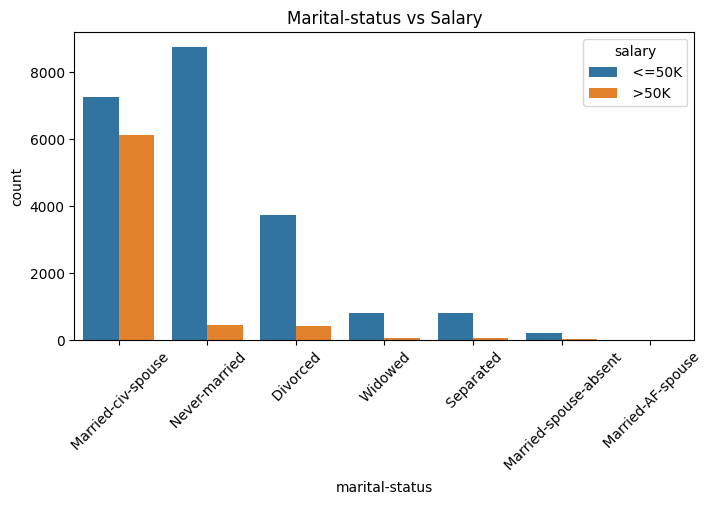

In [ ]:
tabla_marital = pd.crosstab(df["marital-status"], df["salary"], normalize="index") * 100
print("üìä Porcentaje de salario por estado civil:")
print(tabla_marital.round(2))


plt.figure(figsize=(8,4))
sns.countplot(x="marital-status", hue="salary", data=df,
              order=df["marital-status"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Marital-status vs Salary")
plt.show()

Las personas casadas con c√≥nyuge presente (Married-civ-spouse) y las clasificadas como Married-AF-spouse presentan el mayor porcentaje de ingresos superiores a 50K (45,77% y 43,48% respectivamente), lo que indica una asociaci√≥n positiva entre estar casado y percibir salarios m√°s altos. En contraste, los grupos Never-married, Separated y Widowed muestran una proporci√≥n muy baja de ingresos altos (entre 6% y 8%), lo que sugiere que en estos casos predominan los salarios menores o iguales a 50K. Este patr√≥n sugiere que el estado civil podr√≠a ser un factor relevante para diferenciar niveles de ingreso en el an√°lisis.

üìä Porcentaje de salario por tipo de relaci√≥n:
salary          <=50K   >50K
relationship                
Husband         54.26  45.74
Not-in-family   89.45  10.55
Other-relative  96.05   3.95
Own-child       98.64   1.36
Unmarried       93.53   6.47
Wife            50.70  49.30


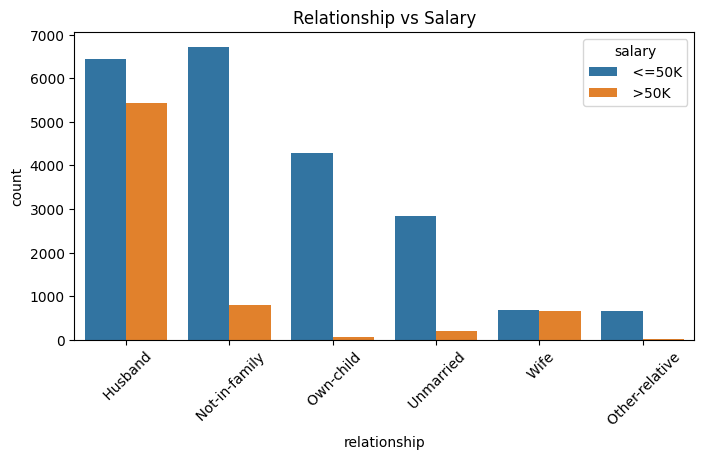

In [ ]:
tabla_relationship = pd.crosstab(df["relationship"], df["salary"], normalize="index") * 100
print("üìä Porcentaje de salario por tipo de relaci√≥n:")
print(tabla_relationship.round(2))

plt.figure(figsize=(8,4))
sns.countplot(x="relationship", hue="salary", data=df,
              order=df["relationship"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Relationship vs Salary")
plt.show()

El tipo de relaci√≥n muestra una fuerte asociaci√≥n con el nivel de ingresos. Los grupos Husband y Wife presentan las mayores proporciones de salarios superiores a 50K (45,74% y 49,30% respectivamente), lo que sugiere que las personas en roles conyugales tienen mayores probabilidades de ingresos altos. En contraste, categor√≠as como Own-child, Other-relative y Unmarried tienen porcentajes muy bajos de salarios >50K (entre 1% y 6%), lo que indica que en estos grupos predominan ingresos menores o iguales a 50K. Este patr√≥n refuerza la idea de que la estructura familiar y el rol dentro del hogar podr√≠an influir significativamente en el nivel de ingresos.

üìä Porcentaje de salario por raza:
salary              <=50K   >50K
race                            
Amer-Indian-Eskimo  88.05  11.95
Asian-Pac-Islander  76.63  23.37
Black               87.46  12.54
Other               89.52  10.48
White               73.49  26.51


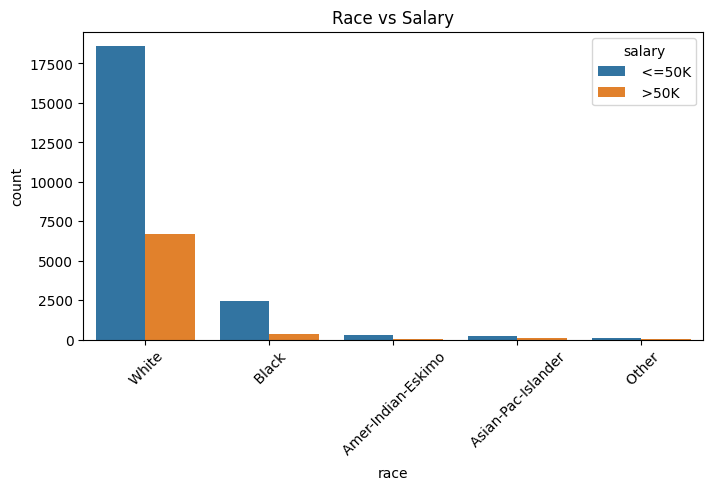

In [ ]:
tabla_race = pd.crosstab(df["race"], df["salary"], normalize="index") * 100
print("üìä Porcentaje de salario por raza:")
print(tabla_race.round(2))

plt.figure(figsize=(8,4))
sns.countplot(x="race", hue="salary", data=df,
              order=df["race"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Race vs Salary")
plt.show()

La variable race muestra una notable disparidad en la proporci√≥n de salarios >50K. El grupo White presenta el porcentaje m√°s alto de ingresos superiores a 50K (26,51%), lo que podr√≠a estar relacionado con una mayor representaci√≥n en ocupaciones o niveles educativos mejor remunerados. En contraste, otras razas como Black, Amer-Indian-Eskimo, Asian-Pac-Islander y Other muestran porcentajes significativamente m√°s bajos, todos por debajo del 12%. Este patr√≥n indica que, dentro del conjunto de datos, la raza podr√≠a estar asociada a diferencias en los ingresos, aunque es importante considerar que esto no implica causalidad, sino que podr√≠a reflejar desigualdades estructurales o distribuci√≥n en tipos de empleo.

üìä Porcentaje de salario por sexo:
salary  <=50K   >50K
sex                 
Female  88.72  11.28
Male    68.39  31.61


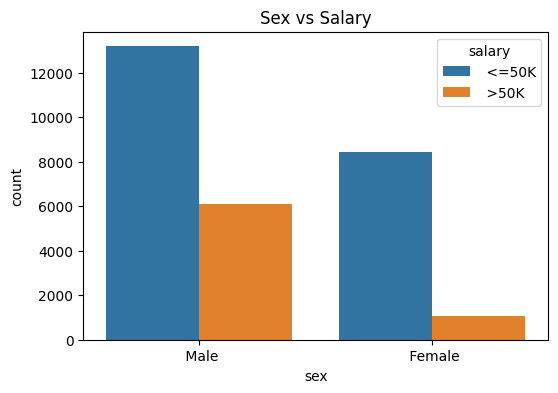

In [ ]:
tabla_sex = pd.crosstab(df["sex"], df["salary"], normalize="index") * 100
print("üìä Porcentaje de salario por sexo:")
print(tabla_sex.round(2))

plt.figure(figsize=(6,4))
sns.countplot(x="sex", hue="salary", data=df,
              order=df["sex"].value_counts().index)
plt.title("Sex vs Salary")
plt.show()

En la variable sex se observa una diferencia significativa en la distribuci√≥n de salarios: el 31,61% de los hombres (Male) perciben ingresos superiores a 50K, frente a solo el 11,28% de las mujeres (Female). Esto sugiere una brecha salarial considerable entre g√©neros, posiblemente vinculada a factores como el tipo de ocupaciones, experiencia laboral, acceso a promociones o sesgos en el mercado laboral. Adem√°s, la mayor√≠a de los registros en ambas categor√≠as de sexo corresponden a ingresos ‚â§50K, lo que refuerza que los salarios altos son menos frecuentes en el conjunto de datos, pero especialmente menos comunes en mujeres.

/tmp/ipython-input-1467522478.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen_race_edu_num = df.groupby("race")["education-num"].agg(["mean", "std", "min", "max", "median", "count"]).round(2)


                     mean   std  min  max  median  count
race                                                    
Amer-Indian-Eskimo   9.38  2.20    2   16     9.0    293
Asian-Pac-Islander  10.66  2.07    3   15    10.0    291
Black                9.50  2.23    1   16     9.0   2800
Other                9.73  2.44    3   16    10.0    124
White               10.30  2.38    1   16    10.0  25288


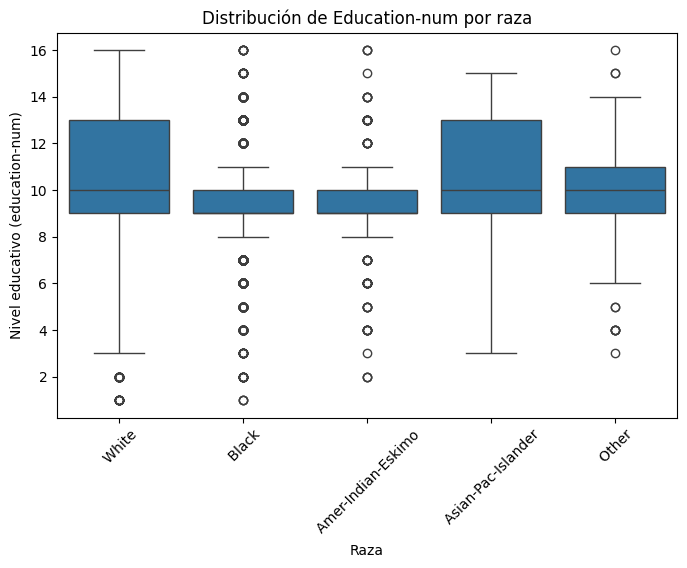

In [ ]:

resumen_race_edu_num = df.groupby("race")["education-num"].agg(["mean", "std", "min", "max", "median", "count"]).round(2)
print(resumen_race_edu_num)


plt.figure(figsize=(8,5))
sns.boxplot(x="race", y="education-num", data=df, order=df["race"].value_counts().index)
plt.title("Distribuci√≥n de Education-num por raza")
plt.ylabel("Nivel educativo (education-num)")
plt.xlabel("Raza")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-3602619830.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen_race_edu_num = df.groupby("race")["education-num"].agg([
/tmp/ipython-input-3602619830.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


üìã Resumen estad√≠stico por raza:

                     mean   std  min  max  median  count
race                                                    
Amer-Indian-Eskimo   9.38  2.20    2   16     9.0    293
Asian-Pac-Islander  10.66  2.07    3   15    10.0    291
Black                9.50  2.23    1   16     9.0   2800
Other                9.73  2.44    3   16    10.0    124
White               10.30  2.38    1   16    10.0  25288


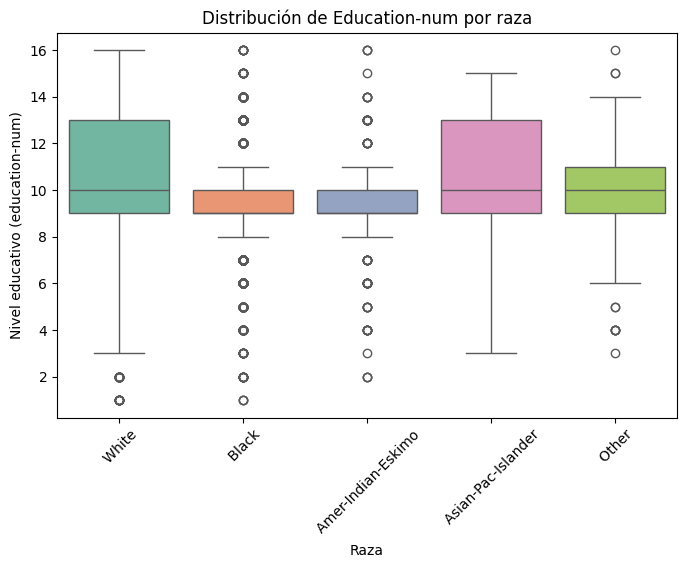

In [ ]:

resumen_race_edu_num = df.groupby("race")["education-num"].agg([
    "mean",    # Promedio
    "std",     # Desviaci√≥n est√°ndar
    "min",     # M√≠nimo
    "max",     # M√°ximo
    "median",  # Mediana
    "count"    # N√∫mero de registros
]).round(2)

print("üìã Resumen estad√≠stico por raza:\n")
print(resumen_race_edu_num)


plt.figure(figsize=(8,5))
sns.boxplot(
    x="race",
    y="education-num",
    data=df,
    order=df["race"].value_counts().index,
    palette="Set2"
)
plt.title("Distribuci√≥n de Education-num por raza")
plt.ylabel("Nivel educativo (education-num)")
plt.xlabel("Raza")
plt.xticks(rotation=45)
plt.show()


Los datos muestran que Asian-Pac-Islander y White tienen niveles educativos promedio y medianos m√°s altos, lo que podr√≠a relacionarse con una mayor proporci√≥n de ingresos superiores a 50K.

Por el contrario, Black y Amer-Indian-Eskimo, con medianas m√°s bajas en education-num, podr√≠an estar en desventaja para alcanzar salarios altos, considerando que el nivel educativo suele estar correlacionado con mejores oportunidades laborales y remuneraciones.

El boxplot confirma que, aunque existen individuos con educaci√≥n alta en todos los grupos, la concentraci√≥n de niveles educativos m√°s altos es mayor en Asian-Pac-Islander y White, lo que probablemente se refleje en una mayor presencia de estos grupos en los salarios >50K.

In [ ]:
df["salary"].unique()


[' <=50K', ' >50K']
Categories (2, object): [' <=50K', ' >50K']

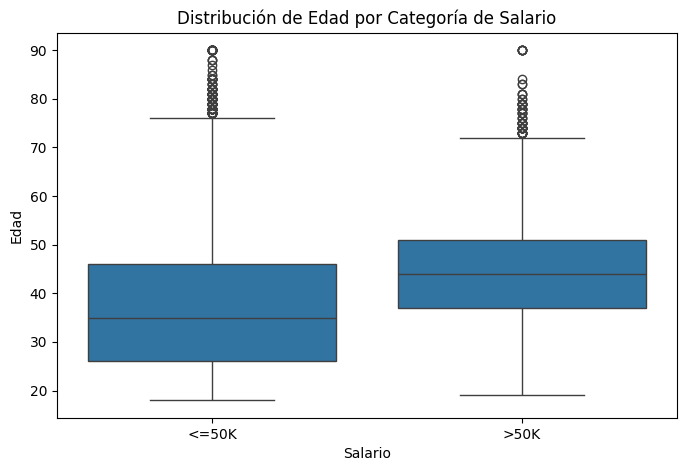

In [ ]:

df["salary"] = df["salary"].str.strip()

plt.figure(figsize=(8,5))
sns.boxplot(x="salary", y="age", data=df, order=["<=50K", ">50K"])
plt.title("Distribuci√≥n de Edad por Categor√≠a de Salario")
plt.ylabel("Edad")
plt.xlabel("Salario")
plt.show()


El an√°lisis de la distribuci√≥n de la edad seg√∫n el nivel de salario revela que las personas con ingresos superiores a 50K suelen tener una edad media m√°s alta que aquellas con ingresos iguales o inferiores a 50K. En el grupo de menores ingresos, la mediana se sit√∫a alrededor de los 35 a√±os, concentr√°ndose principalmente entre los 25 y 45 a√±os. En cambio, para los salarios superiores a 50K, la mediana aumenta a aproximadamente 43-45 a√±os, con una mayor concentraci√≥n entre los 35 y 55 a√±os. Estos resultados sugieren que la experiencia y el tiempo en el mercado laboral influyen de manera significativa en la probabilidad de alcanzar ingresos m√°s elevados, ya que a medida que aumenta la edad tambi√©n crece la proporci√≥n de personas con salarios m√°s altos.

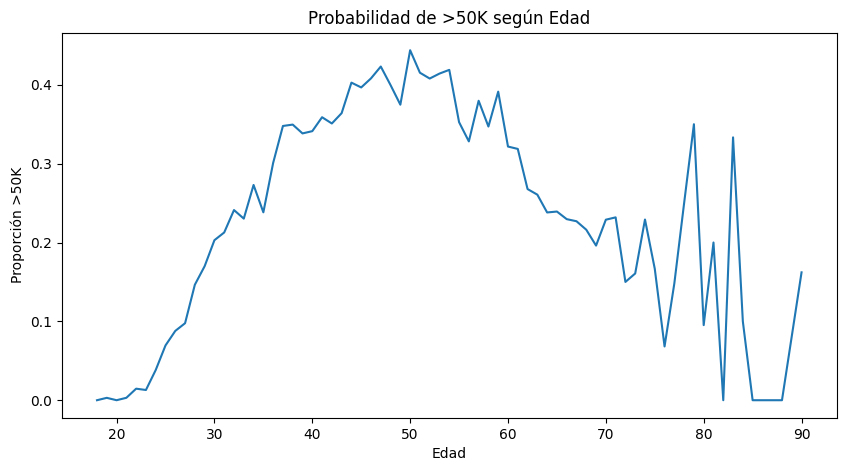

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=df,
    x="age",
    y=df["salary"].apply(lambda x: 1 if x == ">50K" else 0),
    errorbar=None
)
plt.title("Probabilidad de >50K seg√∫n Edad")
plt.ylabel("Proporci√≥n >50K")
plt.xlabel("Edad")
plt.show()


La gr√°fica muestra que la probabilidad de tener un salario superior a 50K aumenta de forma notable a partir de los 25 a√±os, alcanzando su punto m√°ximo entre los 45 y 50 a√±os, donde se supera el 40 % de probabilidad. Despu√©s de los 55 a√±os, la tendencia comienza a disminuir gradualmente, indicando una menor proporci√≥n de ingresos altos en edades avanzadas. En las edades extremas (mayores de 70 a√±os) la variabilidad es alta debido a que hay menos datos, lo que genera fluctuaciones m√°s marcadas. Esto sugiere que la edad laboral media y madura es el periodo con mayor probabilidad de alcanzar salarios m√°s altos, posiblemente por la combinaci√≥n de experiencia acumulada, estabilidad laboral y posiciones mejor remuneradas.

¬øC√≥mo var√≠a el nivel educativo (education-num) entre las personas con salario >50K y <=50K, y qu√© relaci√≥n podr√≠a tener con las oportunidades laborales?

üìä Resumen estad√≠stico de education-num por salario:
         mean   std  min  max  median  count
salary                                      
<=50K    9.76  2.21    1   16     9.0  21625
>50K    11.58  2.33    2   16    12.0   7171


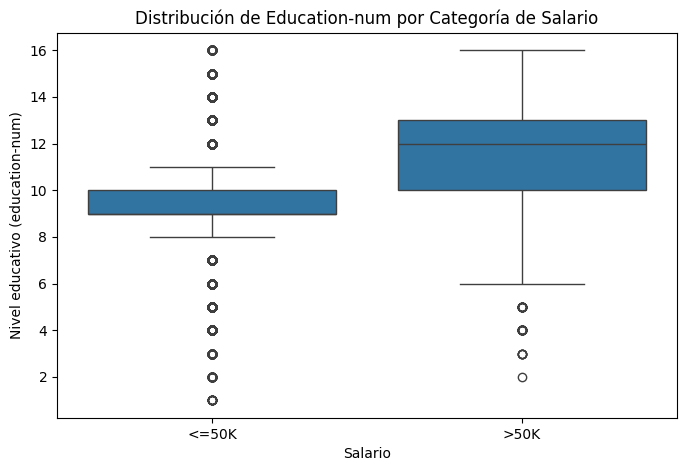

In [ ]:
resumen_edu = df.groupby("salary")["education-num"].agg(["mean", "std", "min", "max", "median", "count"]).round(2)
print("üìä Resumen estad√≠stico de education-num por salario:")
print(resumen_edu)

plt.figure(figsize=(8,5))
sns.boxplot(x="salary", y="education-num", data=df, order=["<=50K", ">50K"])
plt.title("Distribuci√≥n de Education-num por Categor√≠a de Salario")
plt.ylabel("Nivel educativo (education-num)")
plt.xlabel("Salario")
plt.show()

El an√°lisis muestra que las personas con un salario mayor a 50K tienden a tener un nivel educativo m√°s alto que aquellas con salarios de 50K o menos. La mediana de education-num en el grupo de altos ingresos es de 12 a√±os de educaci√≥n, mientras que en el grupo de menores ingresos es de 9 a√±os. Adem√°s, la dispersi√≥n en el grupo >50K es ligeramente mayor, lo que indica que dentro de este grupo hay personas con niveles educativos m√°s variados, aunque en general tienden a estar en niveles altos. Este patr√≥n sugiere una relaci√≥n positiva entre el nivel educativo y la probabilidad de obtener un salario mayor a 50K, lo que respalda la hip√≥tesis de que la educaci√≥n es un factor relevante en el potencial de ingresos.

üìä Resumen estad√≠stico de hours-per-week por salario:
         mean    std  min  max  median  count
salary                                       
<=50K   39.10  12.22    1   99    40.0  21625
>50K    45.51  11.03    1   99    40.0   7171


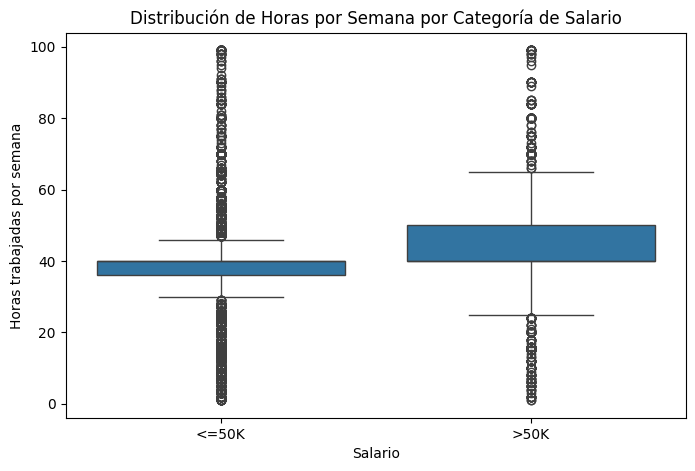

In [ ]:
resumen_hours = df.groupby("salary")["hours-per-week"].agg(["mean", "std", "min", "max", "median", "count"]).round(2)
print("üìä Resumen estad√≠stico de hours-per-week por salario:")
print(resumen_hours)

plt.figure(figsize=(8,5))
sns.boxplot(x="salary", y="hours-per-week", data=df, order=["<=50K", ">50K"])
plt.title("Distribuci√≥n de Horas por Semana por Categor√≠a de Salario")
plt.ylabel("Horas trabajadas por semana")
plt.xlabel("Salario")
plt.show()

El an√°lisis revela que las personas con un salario mayor a 50K trabajan, en promedio, m√°s horas por semana (45.5 horas) en comparaci√≥n con quienes ganan 50K o menos (39.1 horas). Aunque la mediana en ambos grupos es de 40 horas, el grupo de mayores ingresos presenta una mayor concentraci√≥n de individuos que trabajan por encima de la jornada est√°ndar, lo que sugiere que una mayor dedicaci√≥n horaria podr√≠a estar asociada a mejores ingresos. Adem√°s, se observa una menor dispersi√≥n en el grupo >50K, lo que indica que sus horas trabajadas son m√°s consistentes, mientras que en el grupo ‚â§50K existe una mayor variabilidad y casos extremos de jornadas muy bajas o muy altas.

¬øQu√© relaci√≥n existe entre las ganancias/p√©rdidas de capital (capital-gain y capital-loss) y la probabilidad de estar en el grupo >50K?

üìä Resumen estad√≠stico de capital-gain por salario:
           mean       std  min    max  median  count
salary                                              
<=50K    151.73    937.89    0  41310     0.0  21625
>50K    3967.29  14418.23    0  99999     0.0   7171

üìä Resumen estad√≠stico de capital-loss por salario:
          mean     std  min   max  median  count
salary                                          
<=50K    54.14  313.95    0  4356     0.0  21625
>50K    194.47  594.72    0  3683     0.0   7171


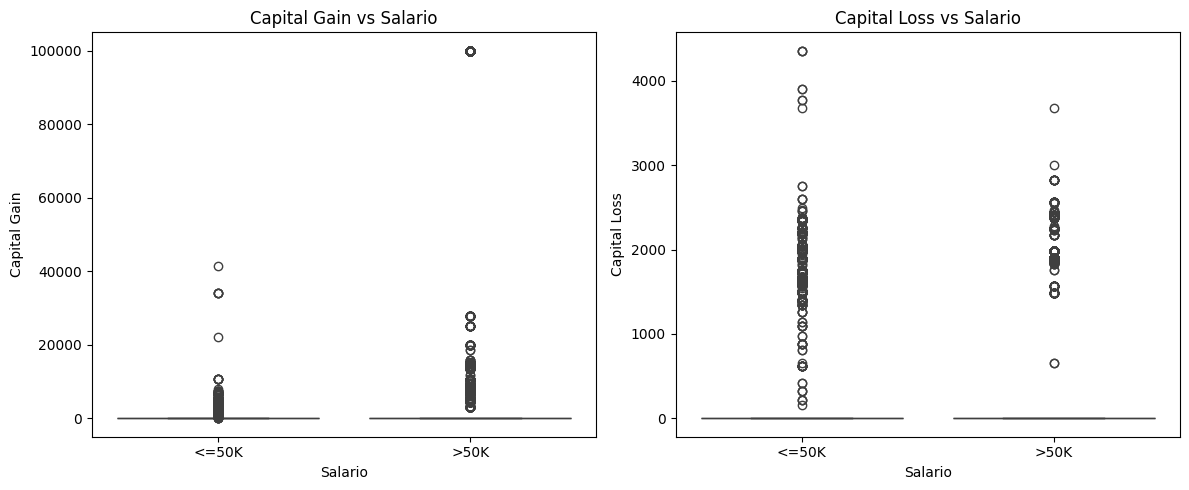

In [ ]:
resumen_gain = df.groupby("salary")["capital-gain"].agg(["mean", "std", "min", "max", "median", "count"]).round(2)
print("üìä Resumen estad√≠stico de capital-gain por salario:")
print(resumen_gain)

resumen_loss = df.groupby("salary")["capital-loss"].agg(["mean", "std", "min", "max", "median", "count"]).round(2)
print("\nüìä Resumen estad√≠stico de capital-loss por salario:")
print(resumen_loss)


fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(x="salary", y="capital-gain", data=df, order=["<=50K", ">50K"], ax=axes[0])
axes[0].set_title("Capital Gain vs Salario")
axes[0].set_ylabel("Capital Gain")
axes[0].set_xlabel("Salario")

sns.boxplot(x="salary", y="capital-loss", data=df, order=["<=50K", ">50K"], ax=axes[1])
axes[1].set_title("Capital Loss vs Salario")
axes[1].set_ylabel("Capital Loss")
axes[1].set_xlabel("Salario")

plt.tight_layout()
plt.show()

El an√°lisis de capital gain y capital loss en relaci√≥n con el salario muestra una fuerte diferencia entre los grupos.
En cuanto a capital gain, las personas con ingresos superiores a 50K presentan un promedio significativamente mayor (3967.3) frente a las que ganan ‚â§50K (151.7), lo que sugiere que las ganancias de capital son un factor importante asociado a mayores ingresos. Sin embargo, la mediana es cero en ambos casos, indicando que la mayor√≠a de las personas no tienen ganancias de capital y que el promedio est√° influenciado por pocos valores extremos muy altos.

En capital loss, ocurre algo similar aunque menos pronunciado: quienes ganan m√°s de 50K tienen p√©rdidas de capital promedio m√°s altas (194.5) que el grupo de menores ingresos (54.1), con medianas igualmente en cero. Esto indica que tanto las ganancias como las p√©rdidas de capital se concentran en un peque√±o segmento de la poblaci√≥n y est√°n fuertemente asociadas a los ingresos altos, posiblemente por mayor participaci√≥n en inversiones o activos de riesgo.

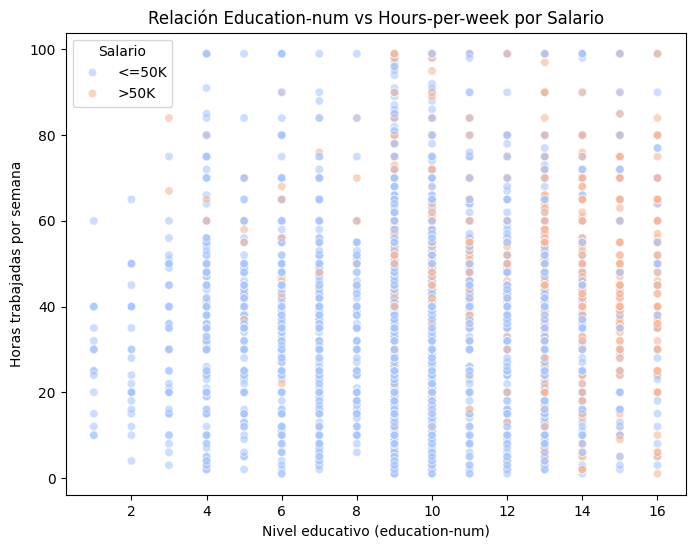

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="education-num",
    y="hours-per-week",
    hue="salary",
    palette="coolwarm",
    alpha=0.6
)
plt.title("Relaci√≥n Education-num vs Hours-per-week por Salario")
plt.xlabel("Nivel educativo (education-num)")
plt.ylabel("Horas trabajadas por semana")
plt.legend(title="Salario")
plt.show()

El gr√°fico muestra que las personas con salarios superiores a 50K (color naranja) tienden a concentrarse en niveles educativos m√°s altos (valores altos de education-num) y en rangos de horas trabajadas semanales moderadas a altas, especialmente alrededor de 40 horas y tambi√©n en grupos que superan las 50 horas.

En contraste, quienes ganan ‚â§50K (color azul) est√°n distribuidos de forma m√°s uniforme a lo largo de todos los niveles educativos y horas trabajadas, con una fuerte presencia en niveles educativos bajos y medios, incluso trabajando m√°s horas. Esto sugiere que un mayor nivel educativo incrementa la probabilidad de obtener salarios m√°s altos, pero que las horas trabajadas por s√≠ solas no garantizan ingresos superiores, siendo la educaci√≥n un factor m√°s determinante.

¬øExiste una tendencia clara entre las horas trabajadas por semana (hours-per-week) y la probabilidad de ganar m√°s de 50K?

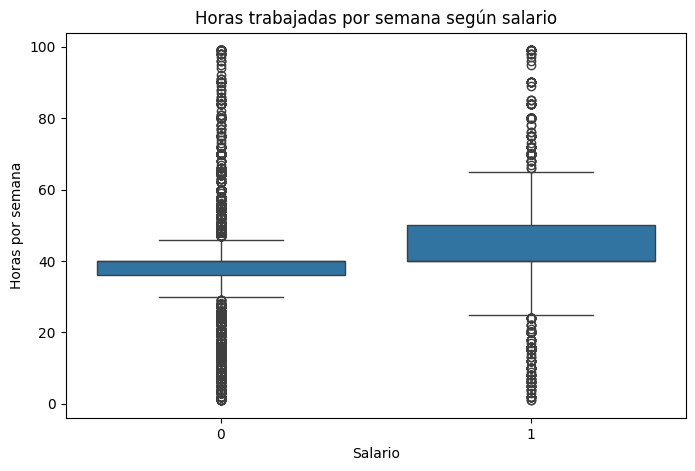

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="salary", y="hours-per-week", data=df, order=['0', '1'])
plt.title("Horas trabajadas por semana seg√∫n salario")
plt.xlabel("Salario")
plt.ylabel("Horas por semana")
plt.show()

# Conclusiones sobre las tendencias y patrones asociados al salario

- G√©nero y salario

La proporci√≥n de hombres con salario >50K es significativamente mayor que la de mujeres (31.6% vs 11.3%), lo que indica una brecha salarial por g√©nero.

Las mujeres est√°n m√°s concentradas en el grupo de ‚â§50K.

- Nivel educativo (education-num)

El nivel educativo promedio es m√°s alto en personas con >50K (media ‚âà 11.6) que en las de ‚â§50K (media ‚âà 9.8).

Existe una relaci√≥n directa: mayor educaci√≥n formal, mayor probabilidad de ingresos altos.

- Horas trabajadas por semana

El grupo de >50K trabaja en promedio m√°s horas (‚âà 45.5) que el de ‚â§50K (‚âà 39.1).

Esto sugiere que mayor dedicaci√≥n semanal est√° asociada con salarios m√°s altos, aunque no necesariamente es el √∫nico factor.

- Edad y salario

La probabilidad de ganar >50K aumenta desde los 20 hasta mediados de los 50 a√±os, alcanzando un pico alrededor de los 45-50.

A partir de esa edad, la probabilidad tiende a descender, lo que refleja un patr√≥n de ciclo laboral.

- Capital gain / loss

Tanto las ganancias como las p√©rdidas de capital son mucho m√°s comunes y elevadas en el grupo >50K.

Esto apunta a que la participaci√≥n en inversiones y activos financieros es un factor diferencial de los ingresos altos.

- Raza y educaci√≥n

Hay variaciones en el nivel educativo promedio seg√∫n raza, pero la variable por s√≠ sola parece tener menos peso que la educaci√≥n-num y las horas trabajadas para predecir el salario.

In [ ]:
print(df.columns)


Index(['age', 'education-num', 'marital-status', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'salary'],
      dtype='object')


In [ ]:
df.nunique()

age                72
education-num      16
marital-status      7
relationship        6
race                5
sex                 2
capital-gain      119
capital-loss       89
hours-per-week     94
salary              2
dtype: int64

In [ ]:

df["sex"] = df["sex"].map({"Male": 1, "Female": 0})
df["salary"] = df["salary"].map({">50K": 1, "<=50K": 0})


In [ ]:

cols_dummies = ["marital-status", "relationship", "race"]
df = pd.get_dummies(df, columns=cols_dummies, drop_first=True)


En el dataset, la variable sex tiene solo dos categor√≠as (‚ÄúMale‚Äù y ‚ÄúFemale‚Äù), por lo que se puede codificar a binaria asignando 1 a ‚ÄúMale‚Äù y 0 a ‚ÄúFemale‚Äù sin p√©rdida de informaci√≥n. La variable salary tambi√©n es dicot√≥mica (<=50K y >50K), por lo que se puede transformar en 1 para ‚Äú>50K‚Äù y 0 para ‚Äú<=50K‚Äù, lo que facilita su uso como variable objetivo en un modelo de predicci√≥n.

Variables como marital-status, relationship y race contienen m√°s de dos categor√≠as sin un orden natural, por lo que no se pueden representar con un n√∫mero entero simple. Para ellas se debe aplicar codificaci√≥n one-hot, generando columnas dummy para cada categor√≠a. Esto evita que el modelo interprete un orden inexistente y permite manejar correctamente la informaci√≥n.

Las variables num√©ricas age, education-num, hours-per-week, capital-gain y capital-loss ya est√°n en un formato adecuado. Sin embargo, dado que capital-gain y capital-loss tienen una gran cantidad de ceros, se podr√≠an crear variables binarias adicionales que indiquen si el valor es mayor que cero, lo que ayudar√≠a a capturar el hecho de que la mayor√≠a de las personas no tienen ganancias o p√©rdidas de capital, sin eliminar la magnitud de las variables originales.